In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-02-26 / Aki Taanila


# Kaksinkertainen eksponentiaalinen tasoitus

Aikasarjaennustamisessa oletan että toteutuneiden havaintojen muodostama aikasarja sisältää informaatiota, joka auttaa tulevien havaintojen ennustamisessa. 

Eksponentiaalisen tasoituksen mallit ovat erityisen suosittuja liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä. Ennustusmenetelmä riippuu siitä, minkälaista systemaattista vaihtelua aikasarjassa esiintyy. Eksponentiaalisia tasoitusmenetelmiä käytettäessä on kolme päävaihtoehtoa:
* **Yksinkertainen eksponentiaalinen tasoitus** aikasarjoille, joissa ei ole trendiä eikä kausivaihtelua. Jos ennustetaan pidemmälle kuin seuraavaan aikaleimaan, niin yksinkertainen eksoponentiaalinen tasoitus antaa kaikille tuleville aikaleimoille saman ennusteen.
* **Kaksinkertainen eksponentiaalinen tasoitus** eli **Holt**in menetelmä aikasarjoille, joissa on trendi, mutta ei kausivaihtelua.
* **Kolminkertainen eksponentiaalinen tasoitus** eli **Holt-Winters**in menetelmä aikasarjoille, joissa on sekä trendi että kausivaihtelu.

Tässä muistiossa käytetään Holtin menetelmää.
Holtin menetelmässä aikasarjan tason **L** (level) hetkellä **t** määrittää lauseke

<b>    L<sub>t</sub> = alfa * Y<sub>t </sub>+ (1 - alfa) * (L<sub>t-1 </sub>+ T<sub>t-1</sub>)</b>

Yllä **Y<sub>t</sub>** on viimeisin havainto ja **T<sub>t-1</sub>** on edellinen trendi. Trendille hetkellä **t** saadaan arvio lausekkeesta

<b>    T<sub>t </sub>= beta * (L<sub>t</sub> - L<sub>t-1</sub>) + (1 - beta) * T<sub>t-1</sub></b>

Ennuste hetkelle **t+p** saadaan

<b>    L<sub>t</sub> + pT<sub>t</sub></b>

Mallin parametrit **alfa** ja **beta** pyritään määrittämään siten että ennustevirheiden neliöiden summa saadaan mahdollisimman pieneksi.

Huomaa, että tässä esimerkissä kaksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on selkeä kausivaihtelu, joka toistuu neljän vuosineljänneksen jaksoissa. Tämän kaksinkertainen eksponentiaalinen tasoitus jättää huomiotta!

Trendin ja kausivaihtelun huomioivan mallin löydät muistiosta https://nbviewer.org/github/taanila/aikasarjat/blob/main/forecast3.ipynb

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import ExponentialSmoothing

sns.set_style('whitegrid')

## Aikasarjaan tutustuminen

In [3]:
df = pd.read_excel('http://taanila.fi/aikasarja.xlsx')
df.head()

,Vuosineljännes,Kysyntä
0,2013-12-31,500
1,2014-03-31,350
2,2014-06-30,250
3,2014-09-30,400
4,2014-12-31,450


In [4]:
# Aikaleimat indeksiin
# to_datetime muuntaa merkkijonomuotoisen tiedon aikaleimoiksi
# format-parametri mahdollistaa erilaisten esitysmuotojen tunnistamisen aikaleimoiksi
df.index = pd.to_datetime(df['Vuosineljännes'], format="%Y-%m-%d")

# Pudotetaan tarpeettomaksi käynyt sarake pois
df = df.drop('Vuosineljännes', axis=1)
df

,Kysyntä
Vuosineljännes,
2013-12-31,500
2014-03-31,350
2014-06-30,250
2014-09-30,400
2014-12-31,450
2015-03-31,350
2015-06-30,200
2015-09-30,300
2015-12-31,350


<Axes: xlabel='Vuosineljännes'>

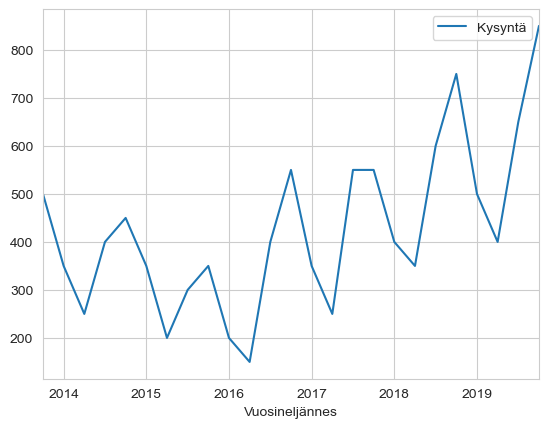

In [5]:
df.plot()

## Mallin sovitus

Ennustemalli sovitetaan (**fit**) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi **malli**), joka sisältää monenlaista tietoa mallista.

**freq**-parametrille käytän arvoa **'QE'**, koska kyseessä ovat vuosineljänneksien viimeiset päivät. Lisätietoa **freq**-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [6]:
malli = ExponentialSmoothing(df['Kysyntä'], trend='add', freq='QE').fit()

In [7]:
# malli-olion avulla saan mallin mukaan simuloidut ennusteet (fittedvalues) jo toteutuneille ajankohdille
df['Ennuste'] = malli.fittedvalues
df

,Kysyntä,Ennuste
Vuosineljännes,,
2013-12-31,500,358.298470
2014-03-31,350,383.620020
2014-06-30,250,366.399862
2014-09-30,400,323.669796
2014-12-31,450,329.829738
2015-03-31,350,352.657136
2015-06-30,200,346.807887
2015-09-30,300,299.551497
2015-12-31,350,286.527550


<Axes: xlabel='Vuosineljännes'>

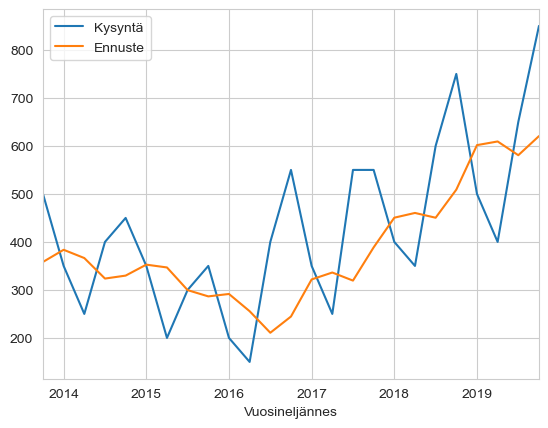

In [8]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [9]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Kysyntä,Ennuste,Ennustevirhe
Vuosineljännes,,,
2013-12-31,500,358.298470,141.701530
2014-03-31,350,383.620020,-33.620020
2014-06-30,250,366.399862,-116.399862
2014-09-30,400,323.669796,76.330204
2014-12-31,450,329.829738,120.170262
2015-03-31,350,352.657136,-2.657136
2015-06-30,200,346.807887,-146.807887
2015-09-30,300,299.551497,0.448503
2015-12-31,350,286.527550,63.472450


## Mallin tarkastelu

Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän

* ennustevirheiden aikasarjaa viivakaaviona
* ennusteiden ja toteutuneiden arvojen hajontakaaviota
* malliin liittyvää statistiikkaa, jonka saan **summary**-funktiolla.

Huomaa erityisesti **SSE** (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.

Text(0, 0.5, 'Ennustevirhe')

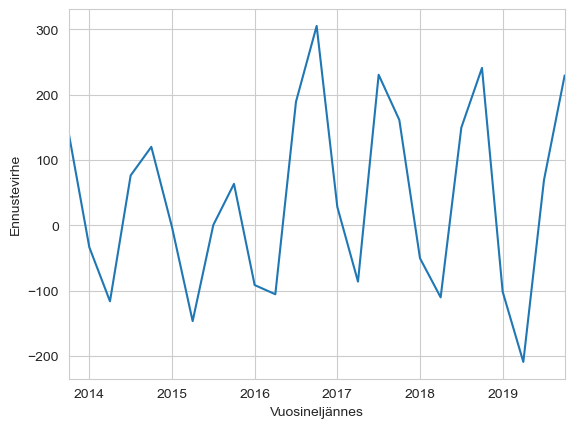

In [10]:
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
# Tässä ennustevirheet eivät vaihtele satunnaisesti, vaan niissä näkyy säännöllinen kausivaihtelu
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

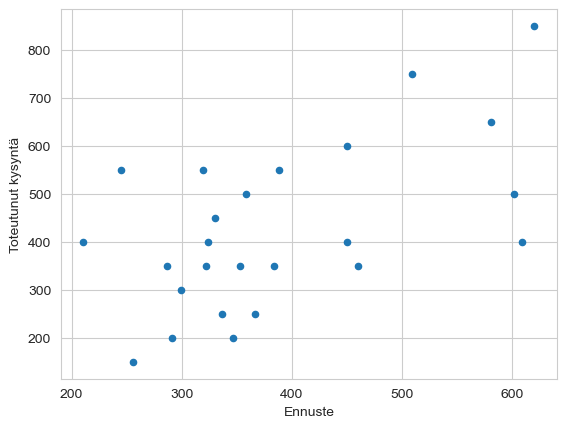

In [11]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
df.plot(kind='scatter', x='Ennuste', y='Kysyntä')
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut kysyntä')

In [12]:
# Mallin statistiikkaa
malli.summary()

Dep. Variable:,Kysyntä,No. Observations:,25
Model:,ExponentialSmoothing,SSE,523546.491
Optimized:,True,AIC,256.738
Trend:,Additive,BIC,261.613
Seasonal:,None,AICC,261.404
Seasonal Periods:,None,Date:,"Wed, 26 Feb 2025"
Box-Cox:,False,Time:,12:59:04
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2323040,alpha,True
smoothing_trend,0.2322406,beta,True


## Ennusteiden laskeminen

Ennustettavien ajankohtien aikaleimojen määrittämiseksi:

* Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
* Ennustettavien ajankohtien lukumäärän voin määrittää **periods**-parametrilla.
* Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty **freq**-parametrin arvo.
        
Lisätietoa **freq**-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [13]:
#Tarkistan viimeisen aikaleiman
df.tail()

,Kysyntä,Ennuste,Ennustevirhe
Vuosineljännes,,,
2018-12-31,750,508.899427,241.100573
2019-03-31,500,601.657610,-101.657610
2019-06-30,400,609.307232,-209.307232
2019-09-30,650,580.657205,69.342795
2019-12-31,850,620.479762,229.520238


In [14]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2020-03-31', periods=8, freq='QE')

# Ennusteet kahdeksalle vuosineljännekselle
ennusteet = malli.forecast(8)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data=ennusteet, index=index, columns=['Ennuste'])
df_ennuste

,Ennuste
2020-03-31,709.894889
2020-06-30,745.991552
2020-09-30,782.088215
2020-12-31,818.184877
2021-03-31,854.281540
2021-06-30,890.378203
2021-09-30,926.474865
2021-12-31,962.571528


<Axes: xlabel='Vuosineljännes'>

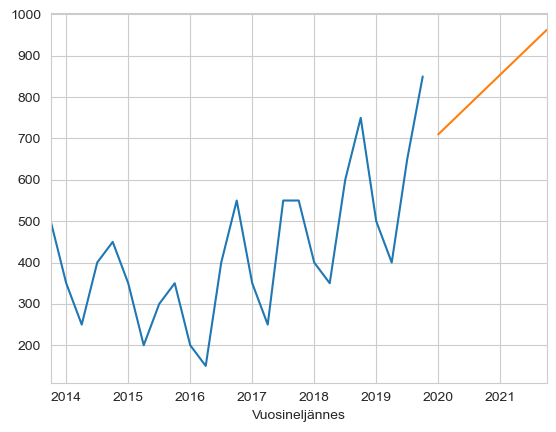

In [15]:
# Viivakaavio havainnoista
df['Kysyntä'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

<h2>Lisätietoa</h2>

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/